## Merge, Join y Concat

### Entorno de trabajo
Importamos las librerías pandas y numpy y creamos dos data frames $df1$ y $df2$ partiendo de dos diccionarios y usando $pd.DataFrame()$.

In [23]:
import pandas as pd
import numpy as np

In [24]:
df1 = pd.DataFrame({'A':['A0', 'A1', 'A2','A3'],
                    'B':['B0', 'B1', 'B2','B3'],
                    'C':['C0', 'C1', 'C2','C3'],
                    'D':['D0', 'D1', 'D2','D3']})

df2 = pd.DataFrame({'A':['A4', 'A5', 'A6','A7'],
                    'B':['B4', 'B5', 'B6','B7'],
                    'C':['C4', 'C5', 'C6','C7'],
                    'D':['D4', 'D5', 'D6','D7']})

### $.concat()$
Concatena los data frames por filas.
$$pd.concat([df1,df2])$$

In [25]:
pd.concat([df1,df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


#### $ignore\_ index=True$
Dentro de la función concat podemos 'resetear' los indices para que estos se generen siguiendo un nuevo orden.

In [26]:
pd.concat([df1,df2],ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


### $axix=1$
Concatena los data frames extendiendo las columnas. Agregar este parámetro en la función concat().
Aunque podemos usar esta función, es más común concatenar los data frames por el eje $0$.

In [27]:
pd.concat([df1,df2],axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


### $.merge()$
Creamos dos nuevos data frames $izq$ y $der$.

In [28]:
izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
                    'A' : ['A0', 'A1', 'A2','A3'],
                    'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
                    'C' : ['C0', 'C1', 'C2','C3'],
                    'D': ['D0', 'D1', 'D2','D3']})

Para hacer merge aplicamos la función de un data frame a otro:
$$data1.merge(data2).$$

In [29]:
izq.merge(der)

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


#### $on=\ 'key'$
Se puede aplicar el merge respecto a una columna en común para los data sets.
$$data1.merge(data2,\ on=\ 'key').$$
$'key'$ hace referencia a la columna de referencia que los data sets tiene en común.

In [30]:
izq.merge(der, on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


Para mostrar una nueva aplicación se modificarán los data sets como se muestra a continuación.

In [31]:
izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
                    'A' : ['A0', 'A1', 'A2','A3'],
                    'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key_2' : ['k0', 'k1', 'k2','k3'],
                    'C' : ['C0', 'C1', 'C2','C3'],
                    'D': ['D0', 'D1', 'D2','D3']})

### $left\_ on=\ '\text{columna 1}',\ right\_ on=\ '\text{columna 2}'.$
En caso que los data sets no tengas columnas en común se pueden agregar las columnas como se muestra:
$$data1.merge(data2,\ left\_ on=\ '\text{columna 1}',\ right\_ on=\ '\text{columna 2}').$$

In [32]:
izq.merge(der, left_on='key', right_on='key_2')

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,k3,C3,D3


Para mostrar otra nueva aplicación se modificarán los data sets como se muestra a continuación.

In [33]:
izq = pd.DataFrame({'key' : ['k0', 'k1', 'k2','k3'],
                    'A' : ['A0', 'A1', 'A2','A3'],
                    'B': ['B0', 'B1', 'B2','B3']})

der = pd.DataFrame({'key_2' : ['k0', 'k1', 'k2',np.nan],
                    'C' : ['C0', 'C1', 'C2','C3'],
                    'D': ['D0', 'D1', 'D2','D3']})

Si aplicamos la misma sentencia $left\_ on=\ '\text{columna 1}',\ right\_ on=\ '\text{columna 2}'$ en el caso de que haya valores nulos, la función omite las filas en donde se encuentran estos valores: muestra los valores de la intersección.

In [34]:
izq.merge(der, left_on='key', right_on='key_2') # en este ejemplo se omitió la fila 3

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2


Podemos trabajar la omisión de la siguiente manera.

### $how=\dots$
$'inner'$: es el parámetro por defecto de la función $merge()$.

$'left'$: mantiene los datos de la izquierda y asigna valores nulos a la derecha.

$'right'$: asigna valores nulos a la izquierda y mantiene los de la derecha.
$$data1.merge(data2,\ left\_ on=\ '\text{columna 1}',\ right\_ on=\ '\text{columna 2}',\ how=\dots).$$

In [35]:
izq.merge(der, left_on='key', right_on='key_2', how='inner') # valor por defecto

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2


In [36]:
izq.merge(der, left_on='key', right_on='key_2', how='left') # mantiene los valores de la izquierda

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,NaN,NaN,NaN


In [37]:
izq.merge(der, left_on='key', right_on='key_2', how='right') # mantiene los valores de la derecha

,key,A,B,key_2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,NaN,NaN,NaN,NaN,C3,D3


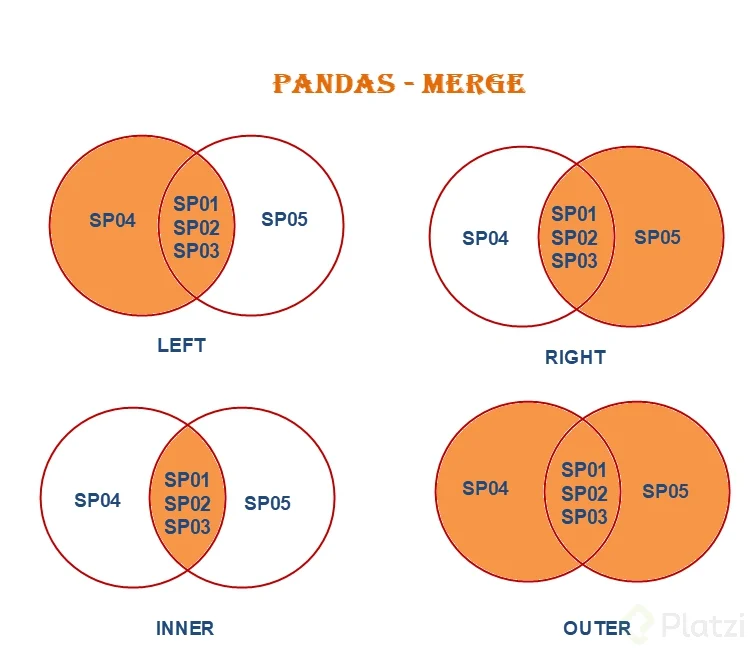

## Join
Encadena los data frame mediante los indices.

Para este ejemplo usamos los siguientes data frames en donde especificamos el indice de los datos.
$$pd.DataFrame(dict,index=list).$$

En este caso, $dict$ es un diccionario que se convirtió en data frame con pandas y $list$ es la lista de referencia a la que se le asignarán los índices.

In [38]:
izq = pd.DataFrame({'A': ['A0','A1','A2'],
  'B':['B0','B1','B2']},
  index=['k0','k1','k2'])

der =pd.DataFrame({'C': ['C0','C1','C2'],
  'D':['D0','D1','D2']},
  index=['k0','k2','k3']) 

### $.join()$
Relaciona los data frames por índices.
$$data1.join(data2).$$

In [39]:
izq.join(der)

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1


En este caso no agregó los dados del índice $'k3'$ porque pertenecen al data frame $der$.

#### $how=\dots$
Podemos agregar la sentencia $how=\dots$ como en el caso de $concat$.

In [40]:
izq.join(der,how='inner') # genera la intersección, en este caso 'k0' y 'k2' tienen datos para ambos data frames

,A,B,C,D
k0,A0,B0,C0,D0
k2,A2,B2,C1,D1


In [41]:
izq.join(der,how='left') # mantiene los valores de la izquierda

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1


In [45]:
izq.join(der,how='right') # mantiene los valores de la derecha

,A,B,C,D
k0,A0,B0,C0,D0
k2,A2,B2,C1,D1
k3,NaN,NaN,C2,D2


In [44]:
izq.join(der,how='outer') # mantiene tanto los valores de la izquierda como de la derecha

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1
k3,NaN,NaN,C2,D2
